In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = pd.read_csv("/content/Physical_Activity_Monitoring_unlabeled.csv")
data

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6


In [ ]:
data.isna().sum()

,0
timestamp,0
handTemperature,4041
handAcc16_1,4041
handAcc16_2,4041
handAcc16_3,4041
handAcc6_1,4041
handAcc6_2,4041
handAcc6_3,4041
handGyro1,4041
handGyro2,4041


In [ ]:
for i in data.columns:
  data[i].fillna(data[i].mean(), inplace=True)
data.isna().sum()

<ipython-input-4-eada1a31a397>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mean(), inplace=True)


,0
timestamp,0
handTemperature,0
handAcc16_1,0
handAcc16_2,0
handAcc16_3,0
handAcc6_1,0
handAcc6_2,0
handAcc6_3,0
handGyro1,0
handGyro2,0


In [ ]:

std = StandardScaler()

X_std = std.fit_transform(data)

X_std = pd.DataFrame(X_std, columns=data.columns)
X_std



,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,-1.077886,1.386442e+00,7.587688e-01,0.585934,0.511722,7.642506e-01,6.181657e-01,5.360725e-01,-1.133458e-02,-2.673760e-02,...,0.010213,0.013752,0.737963,1.135940,-1.146924,-0.511565,0.787192,1.338432,-0.708970,0.190410
1,1.655200,-1.545144e+00,5.201739e-02,0.072218,1.100504,-2.267199e-01,6.551038e-04,6.950502e-01,1.080767e-01,-4.383841e-01,...,-1.033834,0.878227,-0.211312,-0.805741,-0.897704,0.725947,-0.852302,0.298067,-0.537297,-1.103768
2,-0.875290,1.100434e+00,3.450828e-01,-1.784680,-0.866105,3.652836e-01,-1.872793e+00,-8.374967e-01,2.507819e-02,1.449947e-02,...,0.035911,-0.004373,0.516111,0.639334,0.591636,-0.733303,1.375606,0.262860,1.677074,1.484589
3,0.971193,-2.938570e-01,-1.254669e+00,0.363012,-0.833181,-1.311468e+00,3.943481e-01,-8.987701e-01,1.492130e+00,-8.587803e-02,...,-0.213098,-1.722033,0.104606,1.452290,0.369669,0.186813,1.566983,0.008581,1.115497,-1.103768
4,-0.926540,5.999193e-01,6.284556e-01,0.753606,0.083536,6.418530e-01,7.822900e-01,1.469930e-01,1.656410e-03,-3.918929e-02,...,0.006056,-0.002974,0.569975,-0.275392,-0.208698,-0.628965,-1.177727,-0.147122,-0.892024,0.621803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,1.516186,8.144256e-01,-6.608096e-01,0.202770,-0.311576,-7.545546e-01,5.209291e-01,-7.539783e-02,-1.285381e-01,8.072893e-01,...,0.739322,-0.422962,0.194538,-1.156361,0.497737,-0.139712,-1.094544,0.734492,-0.296437,0.190410
534597,0.687313,-4.064424e-15,1.262468e-16,0.000000,0.000000,-2.522451e-16,-1.298738e-16,-4.665321e-16,3.001984e-18,-3.757572e-18,...,-2.811629,-1.503158,-0.360690,1.337209,0.095073,0.251976,1.347038,0.198422,1.416716,0.190410
534598,0.712516,1.279189e+00,-2.746544e-01,-0.127926,-0.490401,-2.820948e-01,-1.298126e-01,-4.346342e-01,1.862056e-01,-4.204564e-01,...,-0.003617,-0.199049,-1.087137,0.832802,-0.875536,0.670446,0.697140,1.319698,0.700236,0.190410
534599,1.482655,-2.510422e+00,1.406804e+00,0.999692,-3.446044,1.806932e+00,3.724246e-01,-2.732899e+00,3.074073e+00,2.955090e+00,...,0.621955,-2.747109,-0.280344,-0.594332,1.400194,-0.991552,-1.267971,-1.048725,-0.907089,0.621803


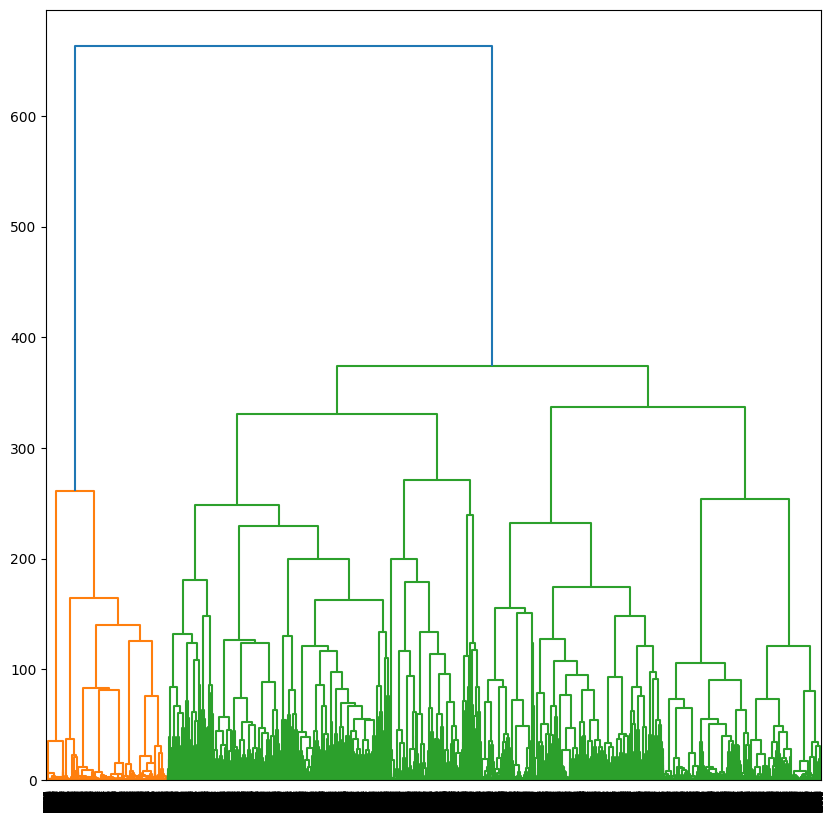

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(X_std.iloc[:30000], 'ward')


fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5)


kmeans.fit(X_std)



Y_pred = kmeans.labels_
Y_pred


array([3, 2, 0, ..., 0, 4, 4], dtype=int32)

In [ ]:
otv = pd.DataFrame()
otv["Index"] = range(1,len(Y_pred) + 1)
otv["activityID"] = Y_pred
otv

,Index,activityID
0,1,3
1,2,2
2,3,0
3,4,0
4,5,1
...,...,...
534596,534597,4
534597,534598,0
534598,534599,0
534599,534600,4


In [ ]:
for i in range(len(Y_pred)):
  if (otv["activityID"][i] == 3):
    otv["activityID"][i] = 1
    continue;
  if (otv["activityID"][i] == 2):
    otv["activityID"][i] = 2
    continue;
  if (otv["activityID"][i] == 0):
    otv["activityID"][i] = 3
    continue;
  if (otv["activityID"][i] == 1):
    otv["activityID"][i] = 4
    continue;
  if (otv["activityID"][i] == 4):
    otv["activityID"][i] = 5
    continue;
otv

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  otv["activityID"][i] = 3
<ipython-input-9-5c0337a55e5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otv["activityID"][i] = 3
<ipython-input-9-5c0337a55e5f>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are se

,Index,activityID
0,1,1
1,2,2
2,3,3
3,4,3
4,5,4
...,...,...
534596,534597,5
534597,534598,3
534598,534599,3
534599,534600,5


from matplotlib import pyplot as plt
otv['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
otv['activityID'].plot(kind='hist', bins=20, title='activityID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
otv.plot(kind='scatter', x='Index', y='activityID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Index']
  ys = series['activityID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = otv.sort_values('Index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Index')
_ = plt.ylabel('activityID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Index'}, axis=1)
              .sort_values('Index', ascending=True))
  xs = counted['Index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = otv.sort_values('Index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
otv['Index'].plot(kind='line', figsize=(8, 4), title='Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
otv['activityID'].plot(kind='line', figsize=(8, 4), title='activityID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
otv["Index"]-=1

In [ ]:
otv.to_csv('output.csv', index=False)
